<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-датафрейма" data-toc-modified-id="Подготовка-датафрейма-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка датафрейма</a></span><ul class="toc-item"><li><span><a href="#Загрузка-датафрейма" data-toc-modified-id="Загрузка-датафрейма-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка датафрейма</a></span></li><li><span><a href="#Первичный-анализ-данных" data-toc-modified-id="Первичный-анализ-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Первичный анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-распределения-целевого-признака" data-toc-modified-id="Анализ-распределения-целевого-признака-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Анализ распределения целевого признака</a></span></li><li><span><a href="#Анализ-распределения-количества-знаков-в-твитах" data-toc-modified-id="Анализ-распределения-количества-знаков-в-твитах-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Анализ распределения количества знаков в твитах</a></span></li><li><span><a href="#Определение-достоверности-работы-SentimentIntensityAnalyzer-на-размеченных-данных" data-toc-modified-id="Определение-достоверности-работы-SentimentIntensityAnalyzer-на-размеченных-данных-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Определение достоверности работы <code>SentimentIntensityAnalyzer</code> на размеченных данных</a></span></li></ul></li><li><span><a href="#Подготовка-текстовых-данных" data-toc-modified-id="Подготовка-текстовых-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Подготовка текстовых данных</a></span><ul class="toc-item"><li><span><a href="#Очистка-текста-от-лишних-знаков" data-toc-modified-id="Очистка-текста-от-лишних-знаков-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Очистка текста от лишних знаков</a></span></li><li><span><a href="#Лемматизация-слов-текстов" data-toc-modified-id="Лемматизация-слов-текстов-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Лемматизация слов текстов</a></span></li><li><span><a href="#Частотный-анализ" data-toc-modified-id="Частотный-анализ-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Частотный анализ</a></span></li></ul></li><li><span><a href="#Выводы-по-разделу" data-toc-modified-id="Выводы-по-разделу-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Выводы по разделу</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка-выборок" data-toc-modified-id="Подготовка-выборок-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка выборок</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Проверка-на-тестовой-выборке" data-toc-modified-id="Проверка-на-тестовой-выборке-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Проверка на тестовой выборке</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Классификация комментариев по токсичности

**Краткая информация о проекте:** в проекте проводится обучение моделей для дальнейшей возможности классификации комментариев на их токсичность. Автоматическая классификация позволит оптизировать работу модерации комментариев.

**План работы:**
1. Загрузить данные;
2. Провести первичный и частотный анализ комментариев;
3. Подготовить данные для обучения модели;
4. Обучить различные модели и выбрать лучшую по выбранной метрики качества.

**Цель и задачи проекта:**
**Цель** - оптимизировать работу модерации комментариев с помощью их автоматической классификации на токсичность.
**Задачи:**
1. Загрузить данные;
2. Провести первичный и частотный анализ комментариев;
3. Подготовить данные для обучения модели;
4. Обучить различные модели и выбрать лучшую по выбранной метрики качества.

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import math
from tqdm.notebook import tqdm
tqdm.pandas()

import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('vader_lexicon')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.corpus import wordnet
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tag import pos_tag

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Подготовка датафрейма

### Загрузка датафрейма

In [2]:
data = pd.read_csv('/datasets/toxic_comments.csv', usecols=['text', 'toxic'])

In [3]:
display(data.head())
data.info()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


### Первичный анализ данных

#### Анализ распределения целевого признака

In [4]:
def percent(pct, table):
    absolute = int(round(pct/100 * table.sum()))
    return f"{pct:.1f}% \n{absolute}"

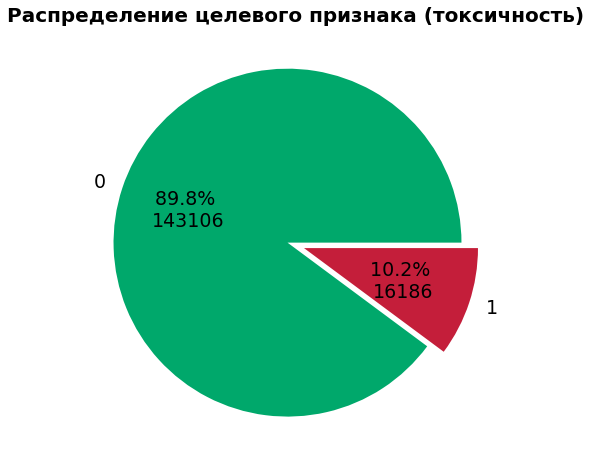

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['#00A86B', '#C41E3A']

table = data['toxic'].value_counts()
wedges, texts, autotexts = ax.pie(table, autopct=lambda pct: percent(pct, table), colors=colors, 
                                  radius=1, labels=table.index, explode=[0.05 for i in range(len(table.index))])
plt.setp(autotexts, size=19)
plt.setp(texts, size=19)
ax.set_title('Распределение целевого признака (токсичность)', size=20, weight='bold')

plt.show()

**Вывод по графику:** В целевом признаке присутствует дисбаланс классов - 89.8 % нетоксичных твитов и 10.2 % токсичных твитов.

#### Анализ распределения количества знаков в твитах

In [6]:
data['signs_quantity'] = data['text'].apply(lambda x: len(x))

In [7]:
signs_0 = data.query('toxic == 0')['signs_quantity'].describe()
signs_1 = data.query('toxic == 1')['signs_quantity'].describe()
signs = pd.DataFrame({'qs_toxic_0': signs_0, 'qs_toxic_1': signs_1})
display(signs)

,qs_toxic_0,qs_toxic_1
count,143106.000000,16186.000000
mean,403.956585,302.932411
std,585.914845,618.647890
min,6.000000,5.000000
25%,102.000000,61.000000
50%,216.000000,128.000000
75%,452.000000,282.750000
max,5000.000000,5000.000000


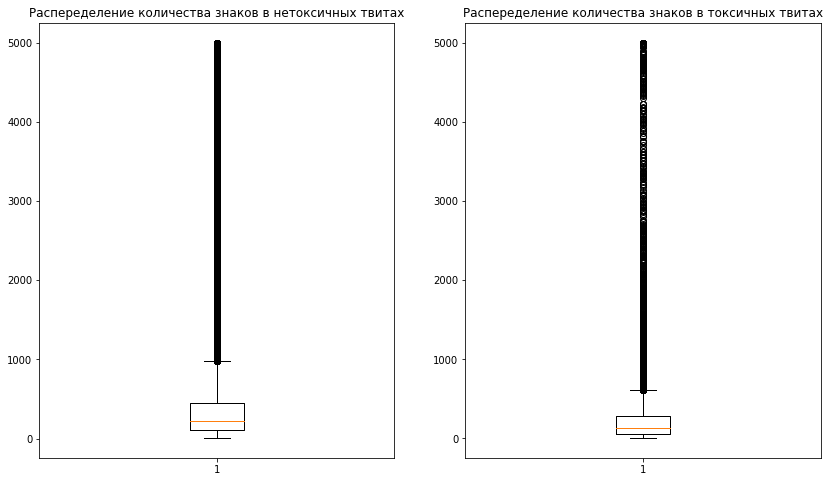

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8))

ax[0].boxplot(data.query('toxic == 0')['signs_quantity'])
ax[0].set_title('Распеределение количества знаков в нетоксичных твитах')
    
ax[1].boxplot(data.query('toxic == 1')['signs_quantity'])
ax[1].set_title('Распеределение количества знаков в токсичных твитах')

plt.show()

**Выводы по графику:** Токсичные твиты (303) в среднем содержат меньше знаков, чем нетоксичные твиты (404).

#### Определение достоверности работы `SentimentIntensityAnalyzer` на размеченных данных

In [9]:
senti = SentimentIntensityAnalyzer()
senti_score = data['text'].apply(lambda x: senti.polarity_scores(x))

In [10]:
senti_scores = senti_score.apply(lambda x: round(x['neg']))

In [11]:
predict_senti = pd.concat([data['toxic'], senti_scores], axis=1)
predict_senti['pos'] = predict_senti.apply(lambda x: 1 if x['toxic'] == x['text'] == 1 else 0, axis=1)
display('Количество токсичных отзывов: {}'.format(data.query('toxic == 1')['toxic'].count()))
display('Количество предсказаний настроения текста SentimentIntensityAnalyzer: {}'.format(predict_senti['text'].sum()))
display('Количество правильных/неправильных определений настроений: {} / {}'.
        format(predict_senti['pos'].sum(), predict_senti['text'].sum() - predict_senti['pos'].sum()))

'Количество токсичных отзывов: 16186'

'Количество предсказаний настроения текста SentimentIntensityAnalyzer: 2368'

'Количество правильных/неправильных определений настроений: 1864 / 504'

### Подготовка текстовых данных

#### Очистка текста от лишних знаков

In [12]:
data['clean_text'] = data['text'].progress_apply(lambda x: ' '.join(re.sub(r'[^a-zA-Z]', ' ', x.lower()).split()))

  0%|          | 0/159292 [00:00<?, ?it/s]

In [13]:
display(data.head())

,text,toxic,signs_quantity,clean_text
0,Explanation\nWhy the edits made under my usern...,0,264,explanation why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,0,112,d aww he matches this background colour i m se...
2,"Hey man, I'm really not trying to edit war. It...",0,233,hey man i m really not trying to edit war it s...
3,"""\nMore\nI can't make any real suggestions on ...",0,622,more i can t make any real suggestions on impr...
4,"You, sir, are my hero. Any chance you remember...",0,67,you sir are my hero any chance you remember wh...


#### Лемматизация слов текстов

Создадим функцию для очистки слов маской и их лемматизации

In [14]:
lemmatizer = WordNetLemmatizer()

def token_lemma(text):
    filtered_tokens = [word for word in word_tokenize(text) if not word in stopwords.words('english')]
    tokens = pos_tag(filtered_tokens, tagset='universal')
    lemma = []
    for token in tokens:
        if token[1].startswith('J'):
            word = lemmatizer.lemmatize(token[0], pos=wordnet.ADJ)
        elif token[1].startswith('V'):
            word = lemmatizer.lemmatize(token[0], pos=wordnet.VERB)
        elif token[1].startswith('N'):
            word = lemmatizer.lemmatize(token[0], pos=wordnet.NOUN)
        elif token[1].startswith('R'):
            word = lemmatizer.lemmatize(token[0], pos=wordnet.ADV)
        else:
            word = lemmatizer.lemmatize(token[0], pos=wordnet.NOUN)
        lemma.append(word)
    return ' '.join(lemma)

In [15]:
data['lemma'] = data['clean_text'].progress_apply(lambda x: token_lemma(x))

  0%|          | 0/159292 [00:00<?, ?it/s]

In [16]:
display(data.head())

,text,toxic,signs_quantity,clean_text,lemma
0,Explanation\nWhy the edits made under my usern...,0,264,explanation why the edits made under my userna...,explanation edits make username hardcore metal...
1,D'aww! He matches this background colour I'm s...,0,112,d aww he matches this background colour i m se...,aww match background colour seemingly stuck th...
2,"Hey man, I'm really not trying to edit war. It...",0,233,hey man i m really not trying to edit war it s...,hey man really try edit war guy constantly rem...
3,"""\nMore\nI can't make any real suggestions on ...",0,622,more i can t make any real suggestions on impr...,make real suggestion improvement wonder sectio...
4,"You, sir, are my hero. Any chance you remember...",0,67,you sir are my hero any chance you remember wh...,sir hero chance remember page


#### Частотный анализ

Определим топ 10 встечаемых слов **во всех твитах**

In [17]:
bag = []
for text in data['lemma']:
    token = word_tokenize(text)
    bag.extend(token)

text = nltk.Text(bag)

In [18]:
fdist = FreqDist(text)

In [19]:
display('Топ 10 встречаемых слов')
display(fdist.most_common(10))

'Топ 10 встречаемых слов'

[('article', 74403),
 ('page', 57109),
 ('wikipedia', 48472),
 ('talk', 40406),
 ('use', 32334),
 ('edit', 30915),
 ('one', 30663),
 ('make', 30098),
 ('please', 29849),
 ('would', 29264)]

Определим топ 10 встечаемых слов **в нетоксичных твитах**

In [20]:
bag_0 = []
for text in data.query('toxic == 0')['lemma']:
    token = word_tokenize(text)
    bag_0.extend(token)

text_0 = nltk.Text(bag_0)

In [21]:
fdist_0 = FreqDist(text_0)

In [22]:
display('Топ 10 встречаемых слов в нетоксичных твитах')
display(fdist_0.most_common(10))

'Топ 10 встречаемых слов в нетоксичных твитах'

[('article', 72274),
 ('page', 54251),
 ('wikipedia', 44545),
 ('talk', 38499),
 ('use', 31269),
 ('edit', 29161),
 ('one', 28881),
 ('please', 28805),
 ('would', 28102),
 ('make', 27879)]

Определим топ 10 встечаемых слов **в токсичных твитах**

In [23]:
bag_1 = []
for text in data.query('toxic == 1')['lemma']:
    token = word_tokenize(text)
    bag_1.extend(token)

text_1 = nltk.Text(bag_1)

In [24]:
fdist_1 = FreqDist(text_1)

In [25]:
display('Топ 10 встречаемых слов в токсичных твитах')
display(fdist_1.most_common(10))

'Топ 10 встречаемых слов в токсичных твитах'

[('fuck', 12856),
 ('suck', 4812),
 ('go', 4321),
 ('like', 3947),
 ('wikipedia', 3927),
 ('shit', 3721),
 ('u', 3493),
 ('nigger', 3434),
 ('get', 3381),
 ('as', 2951)]

**Выводы по частотному анализу:** Частота встречания слов в нетоксичных и токсичных твитах сильно отличаются. В токсичных твитах часто встречаются слова ненормативной лексики.

### Выводы по разделу

- В данных **159 292** размеченных текстов твитов;
- В **целевом** признаке присутствует **дисбаланс** классов - **89.8 %** нетоксичных твитов и **10.2 %** токсичных твитов;
- Токсичные твиты (**303**) в среднем содержат меньше знаков, чем нетоксичные твиты (**404**);
- В процессе подготовки тестовых данных были выполнены: **очистка текста от знаков пунктуации** и **лемматизация слов**;
- Частота встречания слов в нетоксичных и токсичных твитах сильно отличаются. В **токсичных твитах** часто встречаются **слова ненормативной лексики**.

## Обучение

### Подготовка выборок

In [26]:
X_tr, X_te, y_train, y_test = train_test_split(data['lemma'].drop(columns=['toxic']), 
                                                    data['toxic'], test_size=0.2, random_state=7, 
                                                    stratify=data['toxic'])

Проведем расчет `TF-IDF`

In [27]:
vectorizer = TfidfVectorizer(max_features=150_000)
X_train = vectorizer.fit_transform(X_tr)

In [28]:
X_test = vectorizer.transform(X_te)

**Для обучения возьмем 2 модели: логистическую регрессию и дерево решений**

### Логистическая регрессия

In [29]:
param_logreg = [{'models': [LogisticRegression()],
               'models__penalty': ['l2', 'l1'],
               'models__C': [0.01, 0.1, 1, 10, 100],
               'models__solver': ['saga', 'liblinear']}]

In [30]:
logreg = Pipeline([('models', LogisticRegression(random_state=7))])

In [31]:
random_logreg = RandomizedSearchCV(estimator=logreg, param_distributions=param_logreg, scoring='f1', 
                                   n_jobs=-1, cv=5, n_iter=5, random_state=7)
random_logreg.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('models',
                                              LogisticRegression(random_state=7))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions=[{'models': [LogisticRegression(C=1,
                                                                       penalty='l1',
                                                                       solver='liblinear')],
                                         'models__C': [0.01, 0.1, 1, 10, 100],
                                         'models__penalty': ['l2', 'l1'],
                                         'models__solver': ['saga',
                                                            'liblinear']}],
                   random_state=7, scoring='f1')

In [32]:
display('Гиперпараметры лучшей модели: {}'.format(random_logreg.best_params_))
display('Метрика f1 на кросс-валидации: {}'.format(round(random_logreg.best_score_, 3)))

"Гиперпараметры лучшей модели: {'models__solver': 'liblinear', 'models__penalty': 'l1', 'models__C': 1, 'models': LogisticRegression(C=1, penalty='l1', solver='liblinear')}"

'Метрика f1 на кросс-валидации: 0.772'

### Дерево решений

In [33]:
param_tree = [{'models__max_depth': [10, 15, 20],
               'models__min_samples_split': [10, 40, 80]}]

In [34]:
tree = Pipeline([('models', DecisionTreeClassifier(random_state=7))])

In [35]:
random_tree = RandomizedSearchCV(estimator=tree, param_distributions=param_tree, scoring='f1', 
                                 n_jobs=-1, cv=5, n_iter=5, random_state=7)
random_tree.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('models',
                                              DecisionTreeClassifier(random_state=7))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions=[{'models__max_depth': [10, 15, 20],
                                         'models__min_samples_split': [10, 40,
                                                                       80]}],
                   random_state=7, scoring='f1')

In [36]:
display('Гиперпараметры лучшей модели: {}'.format(random_tree.best_params_))
display('Метрика f1 на кросс-валидации: {}'.format(round(random_tree.best_score_, 3)))

"Гиперпараметры лучшей модели: {'models__min_samples_split': 80, 'models__max_depth': 20}"

'Метрика f1 на кросс-валидации: 0.667'

### Проверка на тестовой выборке

**Для проверки на тестовой выборке используем лучшую обученную модель - логистическая регрессия.**

In [37]:
y_pred = random_logreg.best_estimator_.predict(X_test)

In [38]:
logreg_f1 = f1_score(y_test, y_pred)
display(f'Значение метрики f1 на тестовой выборке: {round(logreg_f1, 3)}')
display(f'Гиперпараметры лучшей модели: {random_logreg.best_params_}')

'Значение метрики f1 на тестовой выборке: 0.783'

"Гиперпараметры лучшей модели: {'models__solver': 'liblinear', 'models__penalty': 'l1', 'models__C': 1, 'models': LogisticRegression(C=1, penalty='l1', solver='liblinear')}"

## Выводы

В процессе выполнения проекта были выполнены следующие задачи:
- В данных **159 292** размеченных текстов твитов;
- В **целевом** признаке присутствует **дисбаланс** классов - **89.8 %** нетоксичных твитов и **10.2 %** токсичных твитов;
- Токсичные твиты (**303**) в среднем содержат меньше знаков, чем нетоксичные твиты (**404**);
- В процессе подготовки тестовых данных были выполнены: **очистка текста от знаков пунктуации** и **лемматизация слов**;
- Частота встречания слов в нетоксичных и токсичных твитах сильно отличаются. В **токсичных твитах** часто встречаются **слова ненормативной лексики**;
- Проведен расчет TF-IDF по словам в очищенном тексте;
- Обучены 2 модели для классификации токсичности текста: `LogisticRegression` и `DecisionTreeClassifier`. По резульатам полученный метрики `f1` на кросс-валидации была выбрана лучшая модель. Гиперпараметры модели: `LogisticRegression(C=1, penalty='l1', solver='liblinear')`. Метрика `f1` на тестовой выборке: **0.783**. 